<a href="https://colab.research.google.com/github/azizdafi/Telecom_churn_Deep_Learning/blob/main/Telecom_churn_Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

In [33]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
file_path = "/content/drive/MyDrive/Colab Notebooks/cap stone/Telecom churn/cell2celltrain.csv"
df = pd.read_csv(file_path)

### Data understanding

In [36]:
x = df.shape
print(f'the dataset has {x[0]} rows and {x[1]} columns')

the dataset has 51047 rows and 58 columns


In [37]:
df.head()


,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [39]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,51047.0,NaN,NaN,NaN,3201956.877818,116905.561666,3000002.0,3100632.0,3201534.0,3305376.0,3399994.0
Churn,51047,2,No,36336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthlyRevenue,50891.0,NaN,NaN,NaN,58.834492,44.507336,-6.17,33.61,48.46,71.065,1223.38
MonthlyMinutes,50891.0,NaN,NaN,NaN,525.653416,529.871063,0.0,158.0,366.0,723.0,7359.0
TotalRecurringCharge,50891.0,NaN,NaN,NaN,46.830088,23.848871,-11.0,30.0,45.0,60.0,400.0
DirectorAssistedCalls,50891.0,NaN,NaN,NaN,0.895229,2.228546,0.0,0.0,0.25,0.99,159.39
OverageMinutes,50891.0,NaN,NaN,NaN,40.027785,96.588076,0.0,0.0,3.0,41.0,4321.0
RoamingCalls,50891.0,NaN,NaN,NaN,1.236244,9.818294,0.0,0.0,0.0,0.3,1112.4
PercChangeMinutes,50680.0,NaN,NaN,NaN,-11.547908,257.514772,-3875.0,-83.0,-5.0,66.0,5192.0
PercChangeRevenues,50680.0,NaN,NaN,NaN,-1.191985,39.574915,-1107.7,-7.1,-0.3,1.6,2483.5


In [40]:
df.OwnsMotorcycle.unique()

array(['No', 'Yes'], dtype=object)

In [41]:
missing_values = df.isna().sum()
print(missing_values)
df = df.dropna()
print('after dropping Null Values', '\n','*'*30)
missing_values = df.isna().sum()
print(missing_values)

CustomerID                     0
Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1    

In [42]:
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


In [43]:
# temp_x = df.columns
# temp_y = df.describe().columns
# res = [item for item in temp_x if item not in temp_y]
# print(res)

In [44]:
# Check Unique Values for each variable and listing values whose count is less than 25
for column in df.columns:
    result = len(df[column].unique())
    print(f"The number of unique variables in {column} column are: {result}")
    if result<=5:
      x = df[column].unique()
      print(f'printing unique values of {column}')
      print('the values are: ', x )
      print('--'*30)


The number of unique variables in CustomerID column are: 49752
The number of unique variables in Churn column are: 2
printing unique values of Churn
the values are:  ['Yes' 'No']
------------------------------------------------------------
The number of unique variables in MonthlyRevenue column are: 12504
The number of unique variables in MonthlyMinutes column are: 2706
The number of unique variables in TotalRecurringCharge column are: 211
The number of unique variables in DirectorAssistedCalls column are: 143
The number of unique variables in OverageMinutes column are: 739
The number of unique variables in RoamingCalls column are: 522
The number of unique variables in PercChangeMinutes column are: 2236
The number of unique variables in PercChangeRevenues column are: 2872
The number of unique variables in DroppedCalls column are: 283
The number of unique variables in BlockedCalls column are: 369
The number of unique variables in UnansweredCalls column are: 832
The number of unique vari

In [45]:
df.drop('CustomerID', axis = 1, inplace = True)
df.drop('ServiceArea', axis = 1, inplace = True)

In [46]:
 num_col = df.describe().columns

In [47]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [48]:
X.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [49]:
X = pd.get_dummies(X, drop_first=True)

In [50]:
y = pd.get_dummies(y, drop_first=True)

In [51]:
y.head()

,Yes
0,1
1,1
2,0
3,0
4,1


In [52]:
X.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,PrizmCode_Town,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_Unknown,MaritalStatus_Yes
0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,...,0,0,0,0,1,0,0,0,0,0
1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,...,0,0,0,0,1,0,0,0,0,1
2,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,1
3,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,...,0,0,0,1,0,0,0,0,0,0
4,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1


In [53]:
# import sklearn
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 14)

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [56]:
X_train.shape

(39801, 83)

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [58]:
clas = Sequential()

In [59]:
len(X.columns)

83

In [60]:
def generate_report():
    # predicting values
    y_pred = classifier.predict(X_test)
    print("\nPredicted values: "+str(y_pred)+"\n")
    y_pred = (y_pred > 0.5)

    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    accuracy = (cm[0,0]+cm[1, 1])/(cm[0,0]+cm[1, 1]+cm[1,0]+cm[0, 1])
    print("\nTest Accuracy: "+str(accuracy)+"\n")

In [61]:
def build_model():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier


In [67]:
classifier = build_model()
classifier.fit(X_train, y_train, batch_size = 500, epochs = 30)
generate_report()

Epoch 1/30
80/80 [==============================] - 1s 2ms/step - loss: 0.6730 - accuracy: 0.7128
Epoch 2/30
80/80 [==============================] - 0s 2ms/step - loss: 0.6006 - accuracy: 0.7144
Epoch 3/30
80/80 [==============================] - 0s 2ms/step - loss: 0.5880 - accuracy: 0.7144
Epoch 4/30
80/80 [==============================] - 0s 2ms/step - loss: 0.5841 - accuracy: 0.7144
Epoch 5/30
80/80 [==============================] - 0s 2ms/step - loss: 0.5821 - accuracy: 0.7144
Epoch 6/30
80/80 [==============================] - 0s 2ms/step - loss: 0.5809 - accuracy: 0.7144
Epoch 7/30
80/80 [==============================] - 0s 2ms/step - loss: 0.5800 - accuracy: 0.7144
Epoch 8/30
80/80 [==============================] - 0s 2ms/step - loss: 0.5792 - accuracy: 0.7144
Epoch 9/30
80/80 [==============================] - 0s 2ms/step - loss: 0.5786 - accuracy: 0.7144
Epoch 10/30
80/80 [==============================] - 0s 2ms/step - loss: 0.5780 - accuracy: 0.7144
Epoch 11/30
80/80 [

In [69]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [71]:
def build_model():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_model, batch_size = 500, epochs = 30)
accuracy_list = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
mean_acc = accuracy_list.mean()
std_acc = accuracy_list.std()
print(mean_acc, std_acc)

classifier.fit(X_train, y_train)
generate_report()

Epoch 1/30


<ipython-input-71-a543dd00dbe0>:8: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = build_model, batch_size = 500, epochs = 30)


72/72 [==============================] - 1s 2ms/step - loss: 0.6779 - accuracy: 0.7142
Epoch 2/30
72/72 [==============================] - 0s 2ms/step - loss: 0.6118 - accuracy: 0.7145
Epoch 3/30
72/72 [==============================] - 0s 2ms/step - loss: 0.5922 - accuracy: 0.7145
Epoch 4/30
72/72 [==============================] - 0s 2ms/step - loss: 0.5864 - accuracy: 0.7145
Epoch 5/30
72/72 [==============================] - 0s 2ms/step - loss: 0.5835 - accuracy: 0.7145
Epoch 6/30
72/72 [==============================] - 0s 2ms/step - loss: 0.5819 - accuracy: 0.7145
Epoch 7/30
72/72 [==============================] - 0s 2ms/step - loss: 0.5808 - accuracy: 0.7145
Epoch 8/30
72/72 [==============================] - 0s 2ms/step - loss: 0.5800 - accuracy: 0.7145
Epoch 9/30
72/72 [==============================] - 0s 2ms/step - loss: 0.5793 - accuracy: 0.7145
Epoch 10/30
72/72 [==============================] - 0s 2ms/step - loss: 0.5786 - accuracy: 0.7145
Epoch 11/30
72/72 [===========

In [63]:
clas.add(Dense(units=len(X.columns), activation = 'relu'))

In [64]:
clas.add(Dense(units = 12, activation = 'LeakyReLU'))
clas.add(Dense(units = 10, activation = 'PReLU'))
clas.add(Dense(units = 7, activation = 'ELU'))
clas.add(Dense(1, activation = 'sigmoid'))

In [193]:
import keras

In [194]:
opt = keras.optimizers.Adam(learning_rate=0.001)

In [195]:
clas.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics= ['accuracy'])

In [65]:
es = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.01,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [197]:
from keras.api._v2.keras.callbacks import EarlyStopping
clas.fit(X_train,y_train, validation_split=0.9, batch_size=20, epochs = 150, callbacks= es)

Epoch 1/150
199/199 [==============================] - 4s 14ms/step - loss: 0.6153 - accuracy: 0.7000 - val_loss: 0.5965 - val_accuracy: 0.7134
Epoch 2/150
199/199 [==============================] - 3s 15ms/step - loss: 0.5758 - accuracy: 0.7153 - val_loss: 0.5983 - val_accuracy: 0.7093
Epoch 3/150
199/199 [==============================] - 6s 28ms/step - loss: 0.5561 - accuracy: 0.7209 - val_loss: 0.6093 - val_accuracy: 0.7116
Epoch 4/150
199/199 [==============================] - 2s 12ms/step - loss: 0.5384 - accuracy: 0.7349 - val_loss: 0.6213 - val_accuracy: 0.7057
Epoch 5/150
199/199 [==============================] - 3s 13ms/step - loss: 0.5206 - accuracy: 0.7417 - val_loss: 0.6216 - val_accuracy: 0.6975
Epoch 6/150
199/199 [==============================] - 3s 13ms/step - loss: 0.5028 - accuracy: 0.7558 - val_loss: 0.6396 - val_accuracy: 0.6913
Epoch 7/150
199/199 [==============================] - 3s 15ms/step - loss: 0.4770 - accuracy: 0.7691 - val_loss: 0.6707 - val_accuracy:

In [156]:
model_h.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [198]:
y_pred = clas.predict(X_test)
y_pred = (y_pred>= 0.5)

311/311 [==============================] - 1s 3ms/step


In [199]:
len(y_pred[0])

1

In [200]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,y_pred)

In [201]:
cm1

array([[5676, 1398],
       [2120,  757]])

In [83]:
cm1

array([[6594,  480],
       [2561,  316]])

------------------------------------------------------------
------------------------------------------------------------
[[5249 1825]
 [1944  933]]




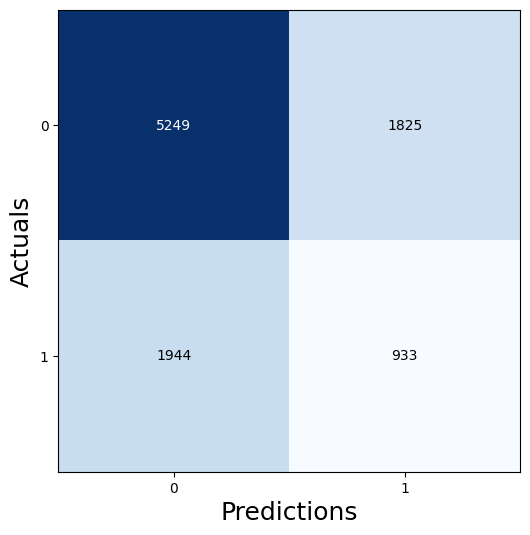

In [44]:
  # y_pred = clas.predict(X_test)
  # confusion_matrix_logic = metrics.confusion_matrix(y_test, y_pred)
  print('--'*30)
  # print(f'confusion matrix for the implemented {output_name}')
  print('--'*30)
  print(cm1)
  print('\n')

  # Plotting the confusion matrix
  fig, ax = plot_confusion_matrix(conf_mat=cm1, figsize=(6, 6), cmap=plt.cm.Blues)
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  # plt.title(f'Confusion Matrix for {output_name}', fontsize=18)
  plt.show()

In [ ]:
str1 = 'The quick brown fox jumps over the lazy dog'
n = 10
l = len(str1)
k = 5
split1 = str1[:n]
split2 = str1[n:n+k]
split3 = str1[n+k:]

split2 = split2[::-1]
res = split1 + split2 + split3
print(res)

The quick nworb fox jumps over the lazy dog


In [ ]:
rows = 5
for j in range(rows+1, 0, -1):
  print("* " * j)

* * * * * * 
* * * * * 
* * * * 
* * * 
* * 
* 


In [ ]:
rows = 10
for j in range(1, rows,):
    print("* " * j)
for j in range(rows, 0, -1):
  print("* " * j)

* 
* * 
* * * 
* * * * 
* * * * * 
* * * * * * 
* * * * * * * 
* * * * * * * * 
* * * * * * * * * 
* * * * * * * * * * 
* * * * * * * * * 
* * * * * * * * 
* * * * * * * 
* * * * * * 
* * * * * 
* * * * 
* * * 
* * 
* 


In [ ]:
import pandas as pd
inp ='abcdefghijklmnopqrstuvwxyz'
lis = []
for i in inp:
  lis.append(i)
series_n = 'xyz'
s = pd.Series(lis, name = series_n)
print(s)


0     a
1     b
2     c
3     d
4     e
5     f
6     g
7     h
8     i
9     j
10    k
11    l
12    m
13    n
14    o
15    p
16    q
17    r
18    s
19    t
20    u
21    v
22    w
23    x
24    y
25    z
Name: xyz, dtype: object
